In [45]:
#carga del corpus                         
import nltk
from nltk.corpus import cess_esp
corpus_sentences=cess_esp.tagged_sents()
number_sentences=len(corpus_sentences)
print ('number sentences:',number_sentences)
print ('number words:',end=" ")
nw=0
for s in range (len(corpus_sentences)):
   nw=nw+len(corpus_sentences[s])
print (nw)
print (corpus_sentences[0:2])

number sentences: 6030
number words: 192686
[[('El', 'da0ms0'), ('grupo', 'ncms000'), ('estatal', 'aq0cs0'), ('Electricité_de_France', 'np00000'), ('-Fpa-', 'Fpa'), ('EDF', 'np00000'), ('-Fpt-', 'Fpt'), ('anunció', 'vmis3s0'), ('hoy', 'rg'), (',', 'Fc'), ('jueves', 'W'), (',', 'Fc'), ('la', 'da0fs0'), ('compra', 'ncfs000'), ('del', 'spcms'), ('51_por_ciento', 'Zp'), ('de', 'sps00'), ('la', 'da0fs0'), ('empresa', 'ncfs000'), ('mexicana', 'aq0fs0'), ('Electricidad_Águila_de_Altamira', 'np00000'), ('-Fpa-', 'Fpa'), ('EAA', 'np00000'), ('-Fpt-', 'Fpt'), (',', 'Fc'), ('creada', 'aq0fsp'), ('por', 'sps00'), ('el', 'da0ms0'), ('japonés', 'aq0ms0'), ('Mitsubishi_Corporation', 'np00000'), ('para', 'sps00'), ('poner_en_marcha', 'vmn0000'), ('una', 'di0fs0'), ('central', 'ncfs000'), ('de', 'sps00'), ('gas', 'ncms000'), ('de', 'sps00'), ('495', 'Z'), ('megavatios', 'ncmp000'), ('.', 'Fp')], [('Una', 'di0fs0'), ('portavoz', 'nccs000'), ('de', 'sps00'), ('EDF', 'np00000'), ('explicó', 'vmis3s0'), ('

In [46]:
# Escribir el corpus en un fichero, preprocesando sus etiquetas
corpus = []
for s in (corpus_sentences):
    sentence=[]
    for x in s:
        word, tag = x
        if(word=='*0*' and tag.startswith('sn')):
            continue
        if(len(tag) >= 3):
            if(tag.startswith('v') or tag.startswith('F')):
                tag = tag[0:3]
            else:
                tag = tag[0:2]
        x = (word, tag)
        sentence.append(x)
    corpus.append(sentence)    


In [47]:
import nltk
frase="El jardinero era muy simpático"
tokens=nltk.word_tokenize(frase,language='spanish')
print (tokens)

['El', 'jardinero', 'era', 'muy', 'simpático']


In [48]:
print (dir(nltk))
help (nltk.word_tokenize)

['AbstractLazySequence', 'AffixTagger', 'AlignedSent', 'Alignment', 'AnnotationTask', 'ApplicationExpression', 'Assignment', 'BigramAssocMeasures', 'BigramCollocationFinder', 'BigramTagger', 'BinaryMaxentFeatureEncoding', 'BlanklineTokenizer', 'BllipParser', 'BottomUpChartParser', 'BottomUpLeftCornerChartParser', 'BottomUpProbabilisticChartParser', 'Boxer', 'BrillTagger', 'BrillTaggerTrainer', 'CFG', 'CRFTagger', 'CfgReadingCommand', 'ChartParser', 'ChunkParserI', 'ChunkScore', 'Cistem', 'ClassifierBasedPOSTagger', 'ClassifierBasedTagger', 'ClassifierI', 'ConcordanceIndex', 'ConditionalExponentialClassifier', 'ConditionalFreqDist', 'ConditionalProbDist', 'ConditionalProbDistI', 'ConfusionMatrix', 'ContextIndex', 'ContextTagger', 'ContingencyMeasures', 'CoreNLPDependencyParser', 'CoreNLPParser', 'Counter', 'CrossValidationProbDist', 'DRS', 'DecisionTreeClassifier', 'DefaultTagger', 'DependencyEvaluator', 'DependencyGrammar', 'DependencyGraph', 'DependencyProduction', 'DictionaryConditio

In [49]:
# Partir el corpus en train y test
number_sentences = len(corpus)
number_train_sentences = round(number_sentences*0.9)
number_test_sentences = number_sentences - number_train_sentences

from nltk.tag import hmm
from sklearn.model_selection import KFold
import numpy as np

c = np.array(corpus, dtype=object)

# Ten-fold cross-validation
# Resultados con shuffle 
kf = KFold(n_splits=10, shuffle=True)
a =kf.get_n_splits(c)

shuffled_results =[]
for train_index, test_index in kf.split(c):

    train = c[train_index]
    test = c[test_index]
    tagger_hmm=hmm.HiddenMarkovModelTagger.train(train)
    shuffled_results.append(tagger_hmm.evaluate(test))

print(shuffled_results)

shuffle_mean = np.average(shuffled_results)


# Resultados sin shuffle 
kf = KFold(n_splits=10, shuffle=False)
a =kf.get_n_splits(c)

non_shuffled_results =[]
# Ten-fold cross-validation
for train_index, test_index in kf.split(c):

    train = c[train_index]
    test = c[test_index]
    tagger_hmm=hmm.HiddenMarkovModelTagger.train(train)
    non_shuffled_results.append(tagger_hmm.evaluate(test))

print(non_shuffled_results)

/tmp/ipykernel_4487/1657981773.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(corpus)


[0.9267420766193576, 0.9291215597565573, 0.9290270704904852, 0.924272537328645, 0.9265452214327689, 0.928040233267348, 0.9227244324099146, 0.9238549418299968, 0.9225542757046552, 0.9242010599004336]
[0.9283174828904097, 0.9237111533931321, 0.9228301472203911, 0.9251465103889185, 0.9228631913204551, 0.8781806196440343, 0.887891425743974, 0.8913107511045656, 0.8911650954798163, 0.8784427571832664]


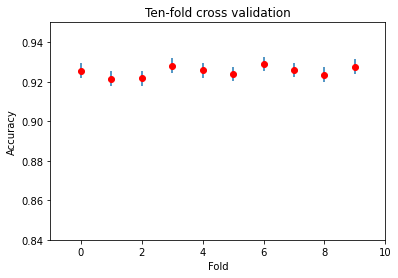

In [9]:
results=[0.9256429844665138, 0.9214948172394981, 0.9216290588882774, 0.928065164498043, 0.9257994411673394, 0.9238618939353883, 0.9288537549407114, 0.9258638743455497, 0.9235440097154021, 0.9276003625313216]
ic=[0.003669639066614048, 0.0038937714086913293, 0.003907817005645873, 0.003683113544930908, 0.0036952781066653846, 0.0037799009714016268, 0.0036823885662779355, 0.0037155909831457644, 0.003784531340824055, 0.003708711344693261]
import matplotlib.pyplot as plt
x=[i for i in range(10)]
y=results
plt.axis([-1, 10, 0.84, 0.95])
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.title('Ten-fold cross validation')
plt.plot(x,y,'ro')
plt.errorbar(x,y,yerr=ic,linestyle='None')
plt.show()